# **<center><mark> Monte Carlo Methods </mark> </center>**

**Background Information:**
- Monte Carlo methods use computational approach/ repeated sampling to simulate real-life data. <br> When answers are unknown, the computational approximations are better than analytical approximations and is commonly used to enhance analytical approximations. 

In [283]:
%matplotlib inline
# necessary 
import pandas as pd
import numpy as np
from numba import jit
import yfinance as yf

# graphing models
import matplotlib.pyplot as plt
import seaborn as sns

# statistical models
from scipy import stats 
import statsmodels.api as sm

# time measurement
import time

start = time.time()

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

Dice roll bet

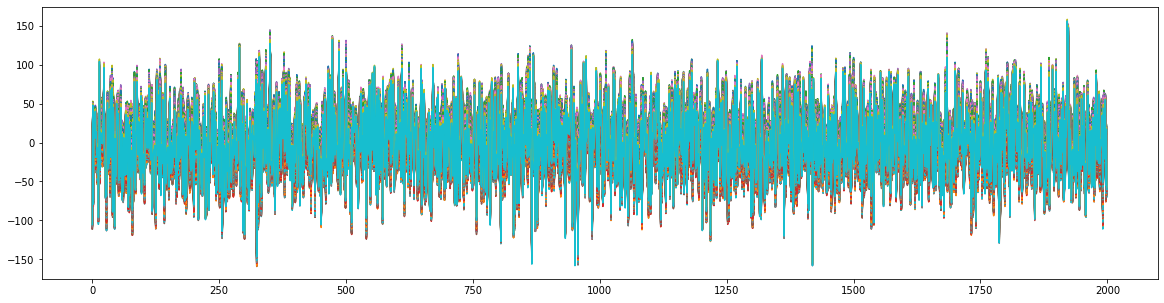

Time: 8.481501340866089


In [284]:
# Suppose you enter into a bet throwing a dice 1000 times.
# Every odd throw you gain the amount of dollars equal to the value you rolled
# and every even throw you lose that amount of dollars equal to the value you rolled.
# we will exclude cases where the dice lands on its edge which will discount the throw.
# We will plot all possible paths and the value at the end.

start = time.time()

@jit(nopython=True)
def dice():
    list = []
    for i in range(2000):
        # rolling the dice and recording the results
        x = np.random.randint(1,6,size = 1000)
        # print(x)
        # The idea is to add every even index value and minus every odd index value
        y = [x[0]]
        for i in range(len(x)-1):
            if i%2==0:
                y.append(y[i] - x[i+1])
            else: 
                y.append(y[i] + x[i+1])
            #print(y)
        list.append(y)
    return list

fig = plt.subplots(figsize=(20, 5))
plt.plot(dice())
plt.show()

print(f'Time: {time.time() - start}')


<blockquote> We can see that there are many possible paths ranging from negative to positive PnL values. They seem to follow a random walk.</blockquote>

Monte Carlo Stock Prices Simulation

[*********************100%***********************]  1 of 1 completed


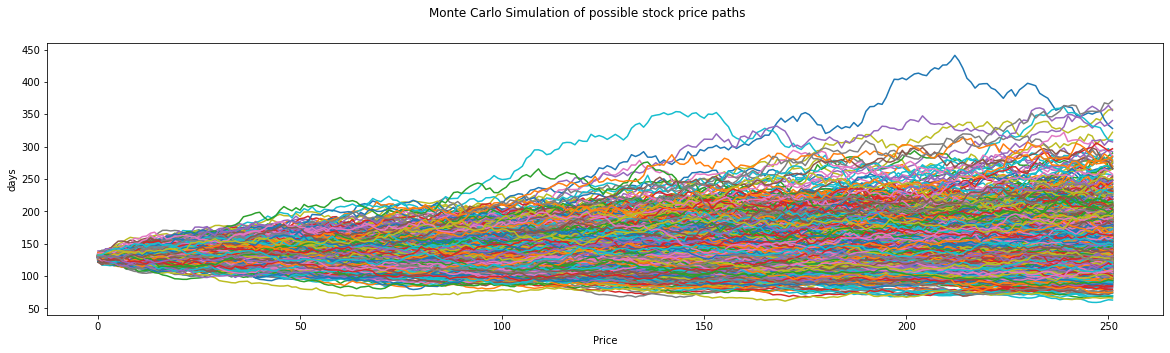

In [287]:
# The process will be similar to our Basic Yahoo query example where we scrape the price data of a stock 
# and plot the possible paths the price will take over the years

# get prices for each date
prices_df = yf.download('AAPL', start = '2013-01-01', end = '2023-01-01')
returns = np.log(1+prices_df['Adj Close'].pct_change())

# using historical mean and standard deviation of AAPL stock prices to model our simulated prices
# mu is mean and sigma is standard deviation
mu, sigma = returns.mean(),returns.std()

# Starting point
initial= prices_df['Adj Close'].iloc[-1]

# setting size and labels for plot
fig, ax = plt.subplots(figsize=(20, 5))
plt.suptitle('Monte Carlo Simulation of possible stock price paths')
ax.set_xlabel('Price')
ax.set_ylabel('days')

# plot 1000 of the possible paths the price will take after 
for i in range(1000):    

    # set distribution to be normal with mean and standard deviation defined earlier
    distribution = stats.norm(loc=mu, scale=sigma)

    # Number of trading days is 252 in a year
    sample =  distribution.rvs(size=252)

    # Simulate prices
    simulation_prices = initial*(sample+1).cumprod()
    plt.plot(simulation_prices)

<blockquote> The monte carlo simulation shows how stock prices can oscillate during the time interval. And the longer the time interval, the higher the variance in the stock prices.</blockquote>

<hr style="height:10px;border:none;background-color:rgb(255, 255, 0);">

| Index | Documentation  |
|--------------|------|
|   Pandas     | https://pandas.pydata.org/pandas-docs/stable/reference/|
|   Numpy      | https://numpy.org/doc/1.24/reference/index.html|
|   Scipy      | https://docs.scipy.org/doc/scipy/reference/stats.html|
|   Statsmodels| https://www.statsmodels.org/stable/api.html|
|   Numba      | https://numba.pydata.org |
|   Latex      | https://www.overleaf.com/learn/latex/Subscripts_and_superscripts |

Another way to get log returns:
- log_returns_df = pd.DataFrame()
- log_returns_df = np.log(prices_df).diff()

Some possible improvements:
- plot Martingale Strategy
- Monte Carlo simulations require a lot of processing and the python interpreter is not efficient for numbers https://www.askpython.com/python-modules/numpy/numba
  Numba python decorator can be used instead.
- Use Monte Carlo method to predict option prices

References:
<nav>
<a href=https://pbpython.com/monte-carlo.html>Monte Carlo example</a> |
<a href=https://docs.scipy.org/doc/scipy/tutorial/stats/resampling.html>Monte Carlo and resampling</a> |
<a href=https://letianzj.github.io/portfolio-management-one.html#more>Portfolio Optimisation</a> |
<a href=https://www.programiz.com/python-programming/decorator>Python Decorators</a> |
<a href=https://www.youtube.com/@QuantPy/videos>Quant Py</a> |
</nav> 